# Лабораторная работа 3. Линейная регрессия

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [11]:
x = np.random.randn(100, 1)
y = 2*x + 1 + np.random.randn(100, 1)

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')

with torch.no_grad():
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.item()}')


Epoch 0, Loss 9.559101104736328
Epoch 100, Loss 4.491300106048584
Epoch 200, Loss 2.3735551834106445
Epoch 300, Loss 1.4352025985717773
Epoch 400, Loss 1.089492678642273
Epoch 500, Loss 0.9873511791229248
Epoch 600, Loss 0.9633368849754333
Epoch 700, Loss 0.9588552117347717
Epoch 800, Loss 0.9581923484802246
Epoch 900, Loss 0.9581149816513062
linear.weight: 2.0122029781341553
linear.bias: 1.1975431442260742


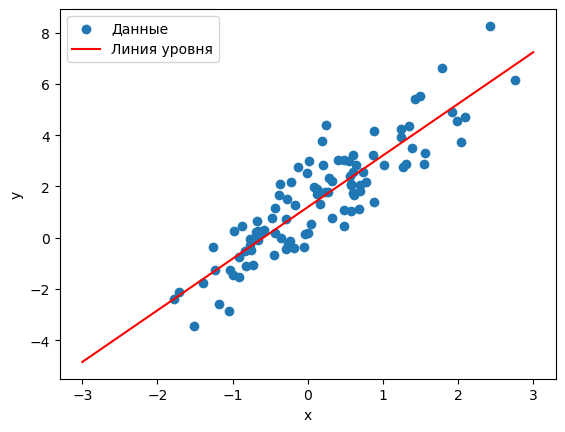

In [14]:
import matplotlib.pyplot as plt

x_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_test = model(torch.tensor(x_test, dtype=torch.float32)).detach().numpy()

plt.scatter(x, y, label='Данные')
plt.plot(x_test, y_test, color='red', label='Линия уровня')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
